In [1]:
import pandas as pd

In [4]:
Url = "https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt"

### Assigning the dataset to a variable'df' as a pandas dataframe

In [5]:
df = pd.read_csv(Url)
df.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


### Delete unwanted column

In [6]:
del df["Unnamed: 0"]

In [7]:
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000


### 1. Insights into the data

In [9]:
rows,columns=df.shape
print('Number of rows : ',rows,'\nNumber of columns :',columns)

Number of rows :  645 
Number of columns : 7


In [10]:
# Getting statistics of every column
df.describe()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [12]:
# Info of the data and its columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sqft         645 non-null    float64
 1   Floor        645 non-null    int64  
 2   TotalFloor   645 non-null    int64  
 3   Bedroom      645 non-null    int64  
 4   Living.Room  645 non-null    int64  
 5   Bathroom     645 non-null    int64  
 6   Price        645 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 35.4 KB


In [13]:
# Checking for null values
df.isnull().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [15]:
# Renaming a misspelt column name
df.rename(columns={'Living.Room':'Livingroom'},inplace=True)

In [16]:
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Livingroom,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000


### 2. Show some interesting visualization of the data

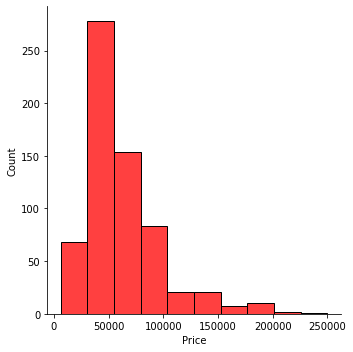

In [19]:
import seaborn as sns
sns.displot(df['Price'],color='red',bins=10)

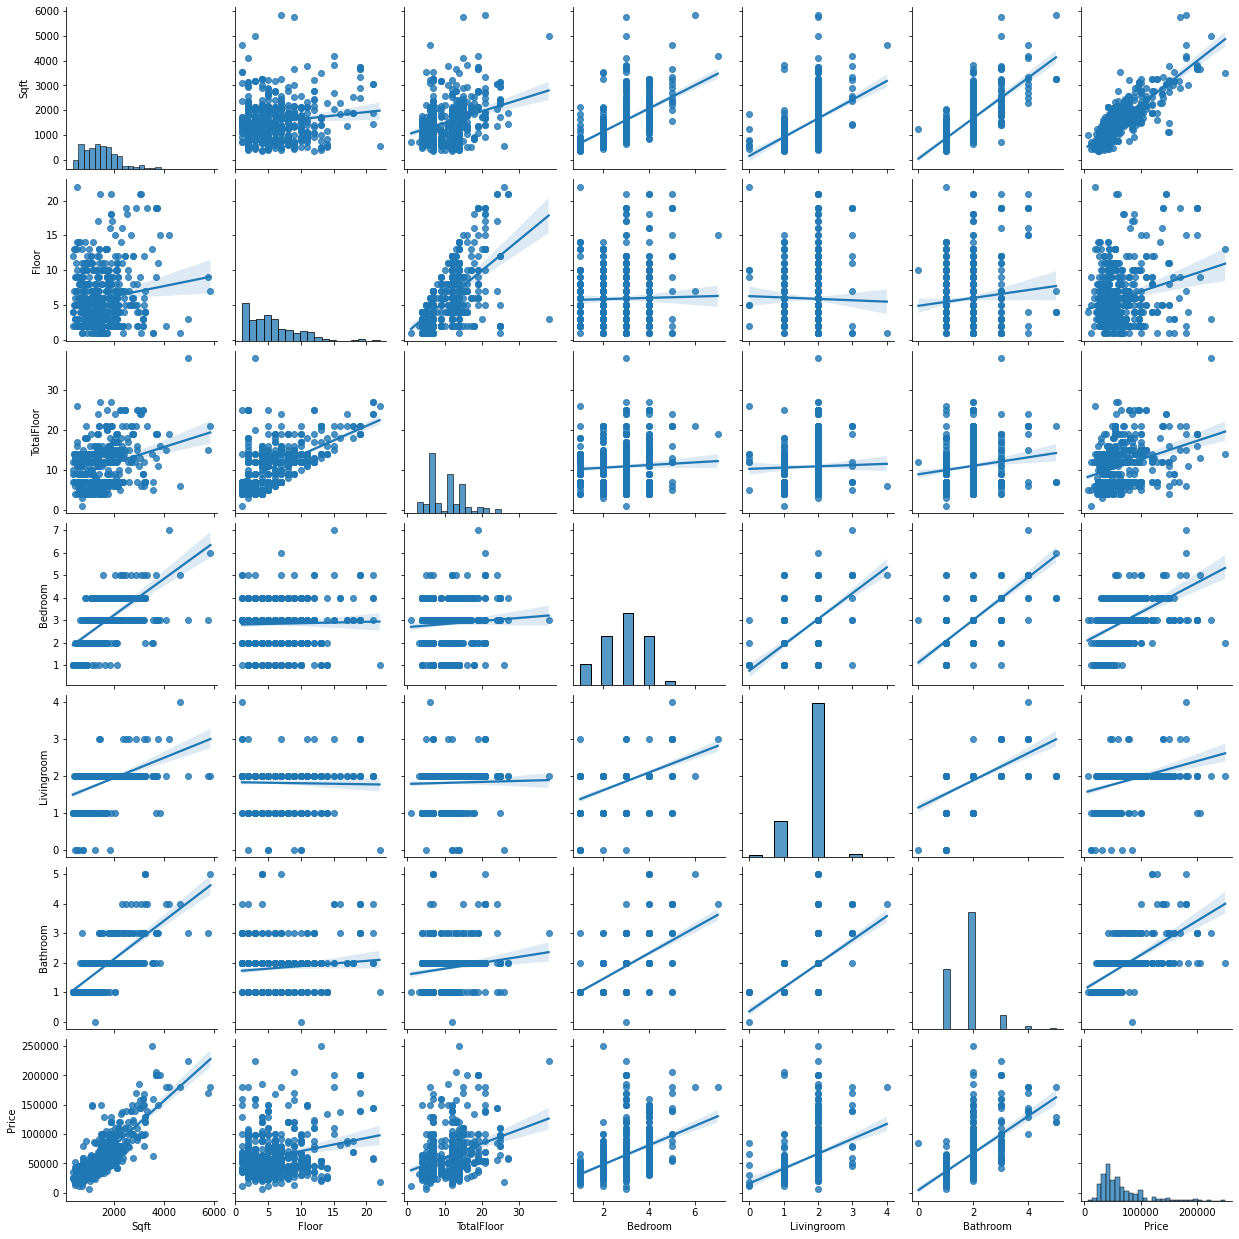

In [22]:
sns.pairplot(df,kind='reg')

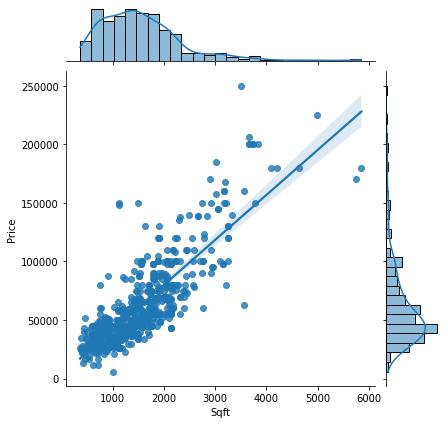

In [23]:
# Comparing Sqft with Price in a jointplot with reg
sns.jointplot(x='Sqft',y='Price',data=df,kind='reg')

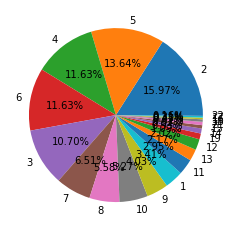

In [31]:
import matplotlib.pyplot as plt
# Pie chart of number of floors
plt.pie(df['Floor'].value_counts(),labels=df['Floor'].value_counts().index,autopct='%1.2f%%')
plt.show()

### 3. Managing data for training and testing

In [32]:
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Livingroom,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000


In [33]:
#split into x and y
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [34]:
#split into train and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [39]:
#perform standardization
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [41]:
#Apply KNN
from sklearn.neighbors import KNeighborsRegressor
nn_model =KNeighborsRegressor(n_neighbors=3)
nn_model.fit(x_train,y_train)
y_pred = nn_model.predict(x_test)

In [42]:
#Check the train and test score
print(nn_model.score(x_train,y_train))

0.8325919104612083


In [43]:
print(nn_model.score(x_test,y_test))

0.695627983157926


### 4. Finding a better value of k

In [44]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = []
for k in range(2,20):
    nn_model = KNeighborsRegressor(n_neighbors=k)
    nn_model.fit(x_train,y_train)
    y_predict = nn_model.predict(x_test)
    
    error = sqrt(mean_squared_error(y_test,y_predict))
    rmse.append(error)
    print(error)

19376.37405633437
19643.564714674078
19393.025964709614
20249.708985636385
20718.5429127998
20980.49393279737
20532.52229231503
20567.87178177867
21150.931622949938
21221.48621716514
21396.610054104338
21478.605946006177
21484.959120427273
21547.979129650463
21568.29666947614
21765.520364397646
21938.085245793343
22125.925569631716


<AxesSubplot:>

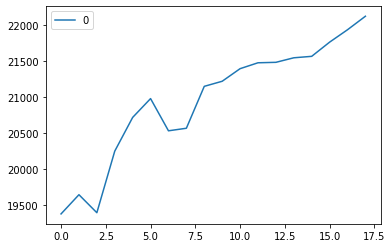

In [45]:
graph = pd.DataFrame(rmse)
graph.plot()